In [1]:
# load pretty jupyter's magics
%load_ext pretty_jupyter

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import matplotlib
from IPython.display import display,HTML,Image
from IPython.display import Markdown as md
import graphviz
from diagrams import Diagram,Cluster,Edge
from diagrams import aws
from diagrams.aws import analytics as aws_analytics
from diagrams.aws import network as aws_network
from diagrams.aws import compute as aws_compute
from diagrams.aws import database as aws_database
from diagrams.onprem import vcs
import fcgadgets.macgyver.util_general as gu
import fcgadgets.macgyver.util_gis as gis
import fcgadgets.bc1ha.bc1ha_utils as u1ha
import fcgadgets.bc1ha.bc1ha_plot as p1ha
import fcgadgets.cbrunner.cbrun as cbr
import fcgadgets.cbrunner.cbrun_util as cbu
import fcgadgets.macgyver.util_fcs_graphs as ufcs
import fcgadgets.macgyver.util_qa as uqa
import fcgadgets.macgyver.util_fcs_qa as qa
import fcgadgets.macgyver.util_inventory as uinv
import fcgadgets.macgyver.util_nose as unose
import fcgadgets.macgyver.util_nm as unm
import fcgadgets.hardhat.harvest_util as hut
import fcgadgets.gaia.gaia_util as uga
import fcexplore.field_plots.Processing.fp_util as ufp
import fcexplore.field_plots.Processing.fp_plot as pfp

In [3]:
# Export
# jupyter nbconvert "G:\My Drive\Code_Python\bc-fcs\documentation\BCFCS_Methods.ipynb" --to=html --template pj
# jupyter nbconvert "G:\My Drive\Code_Python\bc-fcs\documentation\BCFCS_Methods.ipynb" --to=html --TemplateExporter.exclude_input=True

In [4]:
# Prepare session
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
display(HTML("<style>.container { width:80% !important; } .output {align-items:center; }</style>"))
warnings.filterwarnings('ignore');

In [5]:
# Import project information
meta=u1ha.Init()
meta['Paths']['Text']={'Text':meta['Paths']['Projects']['BC-FCS']['Documentation'] + '\\BC FCS 01 Intro and Methods.docx'}
pNam='ACT'; meta['Paths'][pNam]={'Data':r'D:\FCI_Projects\BCFCS_Actual_20K'}
meta['Graphics']['Print Figures']='On'
meta['Graphics']['Show Maps']='Off'

In [6]:
# Import data
gdf_prov=u1ha.Import_GDBs_ProvinceWide(meta)
roi={'Type':'Prov','Name':'Prov'}
meta['Graphics']['Map']['RGSF']=5 # Reduce resolution of maps to preserve memory
meta,roi=u1ha.DefineROI(meta,roi,gdf_prov)
roi=u1ha.Import_Raster(meta,roi,['lc_comp1_2019'])

In [7]:
# Import field plots
meta,fp,soc=ufp.ImportFieldPlotData(meta,type='Stand',include_soil='True')
dObs_ByBGC=ufp.CalcStatsByBGC(meta,fp,soc)
dObs_ByAge=ufp.CalcStatsByAgeClass(meta,fp)

In [8]:
# Import text
txt=ufcs.ImportText(meta,'Text')
txt=ufcs.AddParagraphs(txt,5)

In [9]:
txt=ufcs.AddParagraphs(txt,11)

In [10]:
txt=ufcs.AddParagraphs(txt,10)

In [11]:
txt=ufcs.AddParagraphs(txt,15)

In [12]:
meta=ufcs.TableCaption(meta,'Comparison of between Canadas National Inventory Report (NIR) and the BC Forest Carbon Summary.')
#ufcs.Table(meta['Tables']['BCFCS_ComparisonWithNIR'].copy())
df=pd.DataFrame(meta['Tables']['BCFCS_ComparisonWithNIR'])
df.iloc[np.where(df=='nan')]=np.nan
df=df.fillna(" ")
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','left'),('width','230px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
])
style.set_table_styles({'Attribute':[{'selector':'','props': [('font-weight','bold'),('width','400px')]}]},overwrite=False)  
style.set_properties(**{'text-align':'left'}).hide()
style.format(precision=2)
display(style)

<b>Table 1</b>. Comparison of between Canadas National Inventory Report (NIR) and the BC Forest Carbon Summary.

Attribute,NIR 2021,BC-FCS 2023
Spatial domain,Forest Land,Public Forest Land
Time period,1990-present,1850-2150
Method of anthropogenic partitioning,Area-based method of the NGHGI modelling community of IPPC contributors (Kurz et al. 2018),Scenario comparisons-based method (Global Carbon Budget Modelling community of IPCC contributors; Friedlingstein et al. 2022)
Scope,Scope 1 (domestic LULUCF sector),Scope 1 (domestic LULUCF sector) and Scope 2 (domestic LULUCF sector + international LULUCF sector + geological deposits)
Stratification of results by biophysical process,Yes,Yes
Stratification of results by Tier 3 action categories,No,Yes
Stratification of results by Tier 4 action categories,No,Yes
Direct biogeochemical radiative forcing,Yes,Yes
Indirect biogeochemical radiative forcing,No,No
Biophysical ratiative forcing (albedo),No,No


In [13]:
txt=ufcs.AddParagraphs(txt,3)

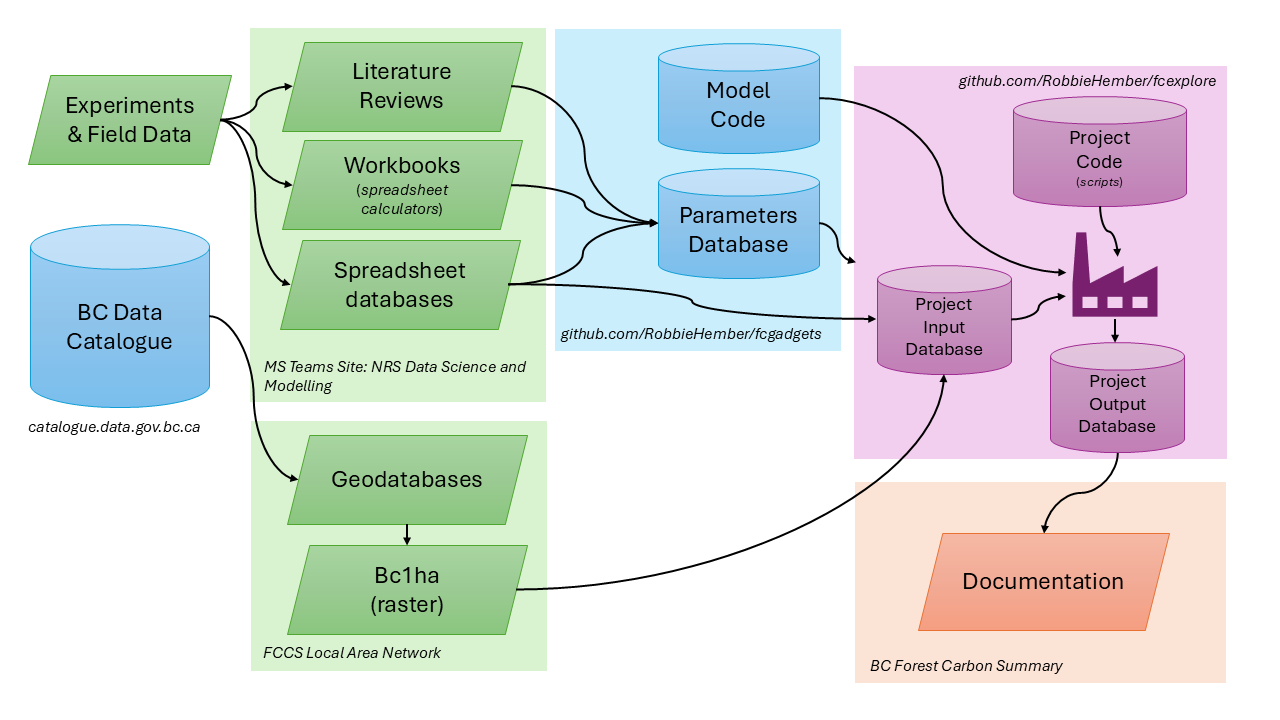

<b>Figure 1</b>. Organization of technical resources used in modelling.

In [14]:
display(Image(filename='images/Technical Resources Schematic.png',width=1000))
meta=ufcs.FigureCaption(meta,'Organization of technical resources used in modelling.')

In [15]:
txt=ufcs.AddParagraphs(txt,2)

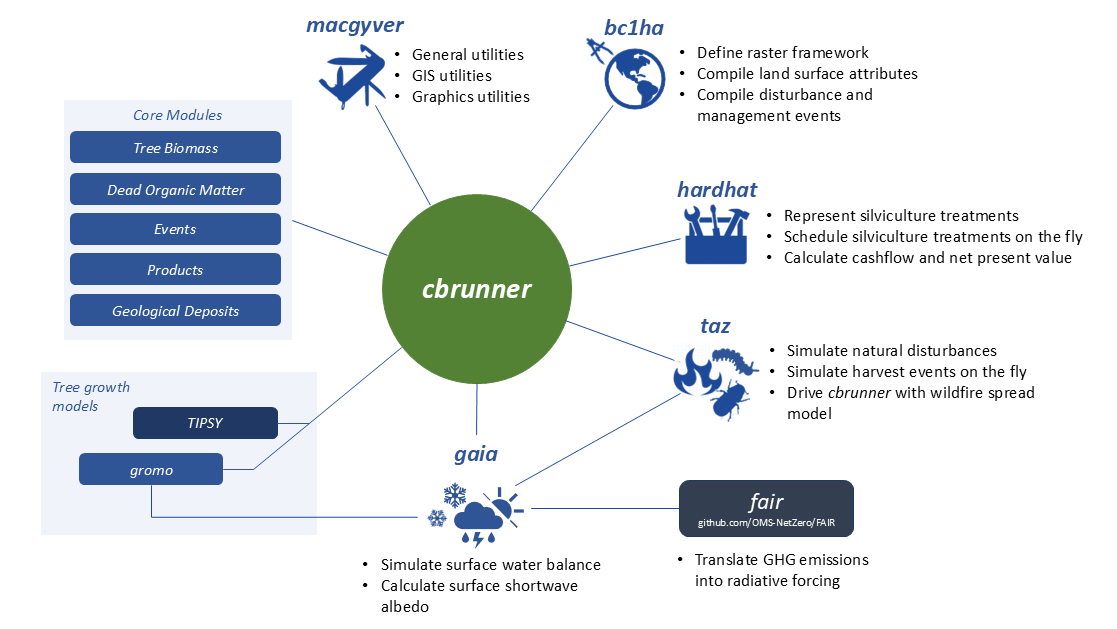

<b>Figure 2</b>. Constellation of modules in <it>fcgadgets</it> repository.

In [16]:
display(Image(filename='images/fcgadgets 01 Constellation.png',width=1000))
meta=ufcs.FigureCaption(meta,'Constellation of modules in <it>fcgadgets</it> repository.')

In [17]:
txt=ufcs.AddParagraphs(txt,2)

In [18]:
meta=ufcs.TableCaption(meta,'List of data sources from the BC Data Catalogue.')
df=pd.read_excel(meta['Paths']['Model']['Parameters'] + '\\Table_BCFCS_DataSources.xlsx')
df.iloc[np.where(df=='nan')]=np.nan
df=df.fillna(" ")
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','left'),('width','200px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
])
style.set_table_styles({'Category':[{'selector':'','props': [('font-weight','bold')]}]},overwrite=False)  
style.set_properties(**{'text-align':'left'}).hide()
style.format(precision=2)
display(style)

<b>Table 2</b>. List of data sources from the BC Data Catalogue.

Category,Source Category,Layer Name
LandCover,WHSE_BASEMAPPING,FWA_RIVERS_POLY
,WHSE_BASEMAPPING,FWA_LAKES_POLY
,WHSE_BASEMAPPING,FWA_WETLANDS_POLY
,WHSE_BASEMAPPING,NRC_RIVERS_1M_SP
,WHSE_BASEMAPPING,NRC_WATERBODIES_1M_SP
LandUse,WHSE_ADMIN_BOUNDARIES,FADM_TSA
,WHSE_ADMIN_BOUNDARIES,FADM_TFL
,WHSE_ADMIN_BOUNDARIES,CLAB_INDIAN_RESERVES
,WHSE_ADMIN_BOUNDARIES,CLAB_NATIONAL_PARKS
,WHSE_BASEMAPPING,NRC_POLITICAL_BOUNDARIES_1M_SP


In [19]:
txt=ufcs.AddParagraphs(txt,2)

In [20]:
txt=ufcs.AddParagraphs(txt,2)

In [21]:
txt=ufcs.AddParagraphs(txt,4)

In [22]:
meta=ufcs.TableCaption(meta,'Data sources contributing to land cover and land use mapping.')
df=pd.DataFrame(meta['Tables']['LCLU_DataSources'].copy())
df=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','left'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]),
    dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
])
df.set_properties(**{'text-align':'left'}).hide()
display(df)

<b>Table 3</b>. Data sources contributing to land cover and land use mapping.

Name,Time period,Agency,Source
North American Land Change Monitoring System (NALCMS),"2010, 2015, 2020",Commission for Environmental Cooperation,http://www.cec.org/north-american-land-change-monitoring-system/
National Terrestrial Ecosystem Monitoring System for Canada (NTEMS),2019,Canadian Forest Service,https://opendata.nfis.org/mapserver/nfis-change_eng.html
BC Vegetation Resource Inventory (BC-VRI),"2002, 2023",BC Ministry of Forests,https://catalogue.data.gov.bc.ca/
Tolan et al (2023),2020,nan,https://gee-community-catalog.org/projects/meta_trees/
Global Forest Change,2000 to 2023,"UMD, Google, USGS, NASA",https://developers.google.com/earth-engine/datasets/catalog/UMD_hansen_global_forest_change_2023_v1_11


In [23]:
if meta['Graphics']['Show Maps']=='On':
    vList=['lc_comp1_2019']; roi=u1ha.Import_Raster(meta,roi,vList); 
    p1ha.Plot_LandCoverComp1(meta,roi,vList[0]); plt.show(); # Don't delete!
    meta=ufcs.FigureCaption(meta,'Land cover classification compilation 1 for reference year 2019.')

In [24]:
txt=ufcs.AddParagraphs(txt,2)

In [25]:
flg=1
if flg==1:
    if meta['Graphics']['Show Maps']=='On':
        vList=['lu_comp1_2019']; roi=u1ha.Import_Raster(meta,roi,vList); 
        p1ha.Plot_LandUseComp1(meta,roi,vList[0]); plt.show(); # Don't delete!
        meta=ufcs.FigureCaption(meta,'Land use classification compilation 1 for reference year 2019.')

In [26]:
flg=0
if flg==1:
    meta=ufcs.TableCaption(meta,'Summary of areas stratified by land cover class in 1800 (columns) and land use class in 2019 (rows) (Mha).')
    df=pd.read_excel(meta['Paths']['bc1ha'] + '\\LandCoverUse\\Land Cover and Land Use Comp1 Summary.xlsx',sheet_name='LC1800 vs LU2019')
    df.iloc[np.where(df=='nan')]=np.nan
    df=df.fillna(" ")
    style=df.style.set_table_styles([
        dict(selector='th',props=[('text-align','left'),('width','70px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
        dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
    ])
    style.set_table_styles({'LU-Comp1-2019':[{'selector':'','props': [('font-weight','bold'),('width','250px')]}]},overwrite=False)  
    style.set_table_styles({'Total (Mha)':[{'selector':'','props':[('font-weight','bold')]}]},overwrite=False)  
    style.set_table_styles({'Total (%)':[{'selector':'','props':[('font-weight','bold')]}]},overwrite=False)  
    style.set_table_styles({13:[{'selector':'td','props':[('font-weight','bold')]}]},axis=1,overwrite=False)  
    style.set_table_styles({14:[{'selector':'td','props':[('font-weight','bold')]}]},axis=1,overwrite=False)  
    style.set_properties(**{'text-align':'left'}).hide()
    style.format(precision=2)
    display(style)

In [27]:
txt=ufcs.AddParagraphs(txt,2)

In [28]:
txt=ufcs.AddParagraphs(txt,5)

In [29]:
flg=1
if flg==1:
    if meta['Graphics']['Show Maps']=='On':
        p1ha.Plot_FieldPlotsPanels(meta,roi); plt.show(); 
    meta=ufcs.FigureCaption(meta,'Map of field plots from (a) vegetation resource inventory (VRI); (b) change monitoring inventory/national forest inventory (CMI/NFI); (c) young stand monitoring (YSM) and (d) soil carbon from Shaw et al. (2018). Sites with single measurements are shown as red circles, while sites with remeasurements are shown as blue squares. Grey shading indicates forest land.')

<b>Figure 3</b>. Map of field plots from (a) vegetation resource inventory (VRI); (b) change monitoring inventory/national forest inventory (CMI/NFI); (c) young stand monitoring (YSM) and (d) soil carbon from Shaw et al. (2018). Sites with single measurements are shown as red circles, while sites with remeasurements are shown as blue squares. Grey shading indicates forest land.

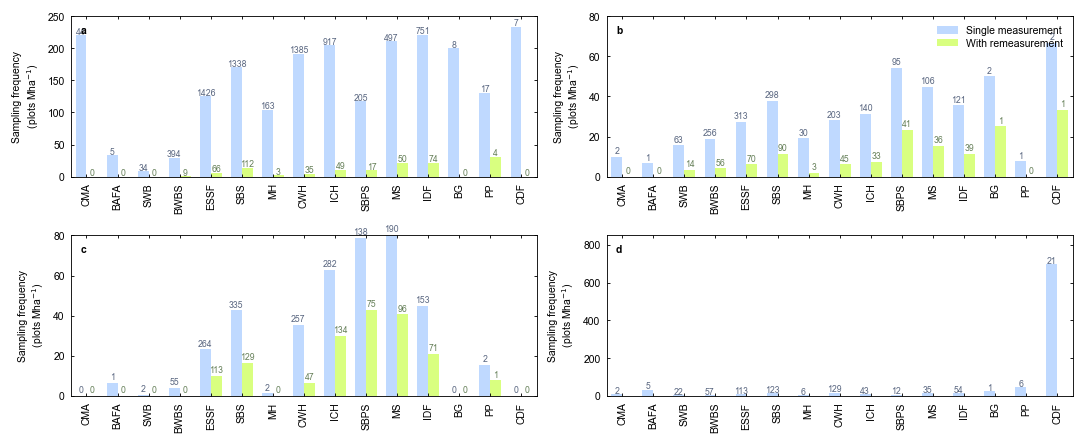

<b>Figure 4</b>. Number of field plot measurements per million hectares of forest stratified by biogeoclimatic zone: (a) VRI; (b) CMI/NFI; (c) YSM; (d) soils from Shaw et al. (2018). Numbers above each bar indicate the total number of field plots.

In [30]:
pfp.SamplingFrequencyByBGC(meta,fp,soc); plt.show(); 
meta=ufcs.FigureCaption(meta,'Number of field plot measurements per million hectares of forest stratified by biogeoclimatic zone: (a) VRI; (b) CMI/NFI; (c) YSM; (d) soils from Shaw et al. (2018). Numbers above each bar indicate the total number of field plots.')

In [31]:
txt=ufcs.AddParagraphs(txt,2)

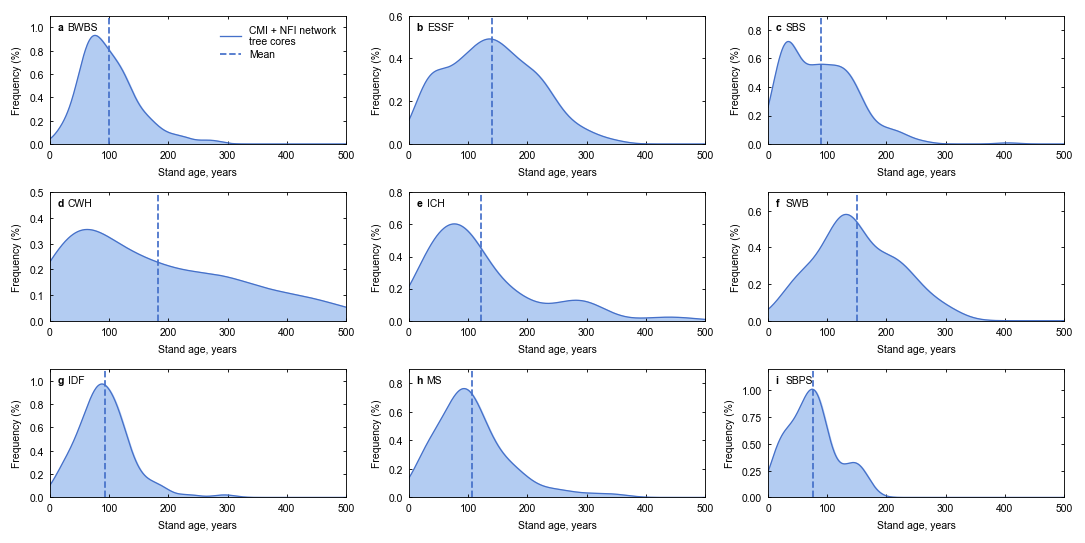

<b>Figure 5</b>. Frequency distributions of stand age from CMI and NFI network core measurements stratified by BGC zone. Vertical dashed lines indicate the mean. Panels for each BGC zone were ordered according to forest area. The analysis was confined to the 9 BGC zones with the highest forest area. Frequencies were calculated by fitting Gaussian kernal density with non-parametric methods.

In [32]:
pfp.AgeDistByBGC_CN(meta,fp); plt.show(); 
meta=ufcs.FigureCaption(meta,'Frequency distributions of stand age from CMI and NFI network core measurements stratified by BGC zone. Vertical dashed lines indicate the mean. Panels for each BGC zone were ordered according to forest area. The analysis was confined to the 9 BGC zones with the highest forest area. Frequencies were calculated by fitting Gaussian kernal density with non-parametric methods.')

In [33]:
txt=ufcs.AddParagraphs(txt,5)

In [34]:
#pfp.BiomassByBGC_CNV(meta,fp,dObs_ByBGC); plt.show(); 
#meta=ufcs.FigureCaption(meta,'Mean biomass density stratified by BGC zone. Left bars indicate CMI/NFI netork, right bars indicate VRI network.')

In [35]:
txt=ufcs.AddParagraphs(txt,1)

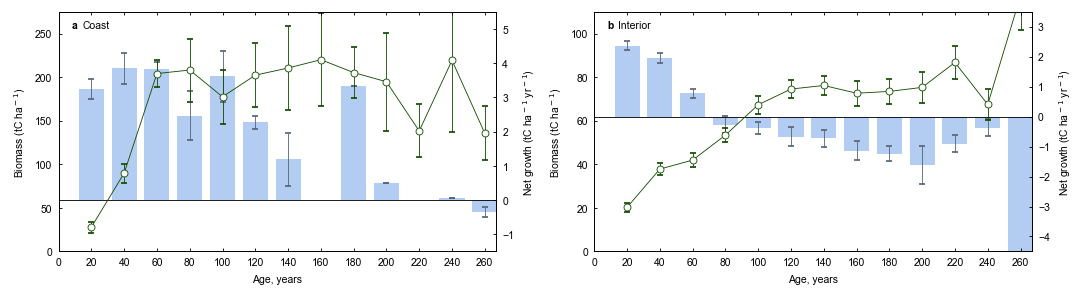

<b>Figure 6</b>. Age responses of tree biomass and tree biomass production stratified by region (a) coast (b) interior.

In [36]:
pfp.AgeResponsesByRegion(meta,dObs_ByAge); plt.show(); 
meta=ufcs.FigureCaption(meta,'Age responses of tree biomass and tree biomass production stratified by region (a) coast (b) interior.')

In [37]:
txt=ufcs.AddParagraphs(txt,4)

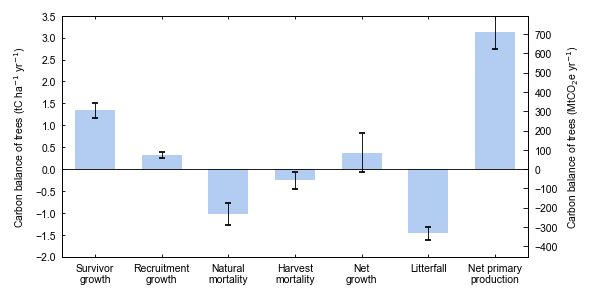

<b>Figure 7</b>. Average tree biomass dynamics from the CMI/NFI network.

In [38]:
pfp.BiomassDynamics_Mean(meta,dObs_ByBGC,'CN'); plt.show(); 
meta=ufcs.FigureCaption(meta,'Average tree biomass dynamics from the CMI/NFI network.')

In [39]:
txt=ufcs.AddParagraphs(txt,2)

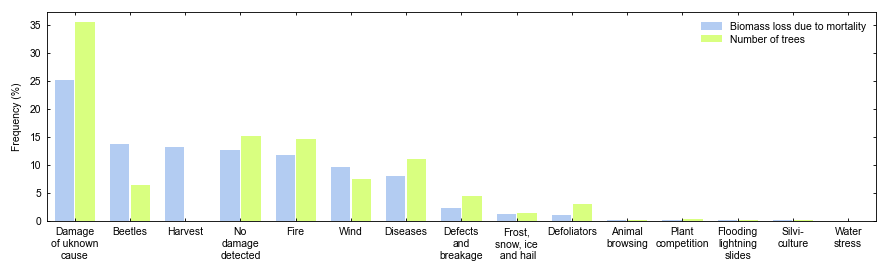

<b>Figure 8</b>. Associations between tree mortality and damage agents.

In [40]:
pfp.MortalityAssociations(meta,fp); plt.show(); 
meta=ufcs.FigureCaption(meta,'Associations between tree mortality and damage agents.')

In [41]:
txt=ufcs.AddParagraphs(txt,2)

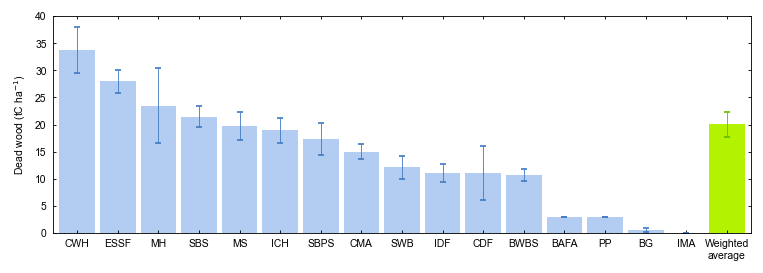

<b>Figure 9</b>. Standing and fallen dead wood at CMI/NFI plots stratified by BGC zone.

In [42]:
pfp.DeadWoodByBGC(meta,dObs_ByBGC,'CN'); plt.show(); 
meta=ufcs.FigureCaption(meta,'Standing and fallen dead wood at CMI/NFI plots stratified by BGC zone.')

In [43]:
txt=ufcs.AddParagraphs(txt,2)

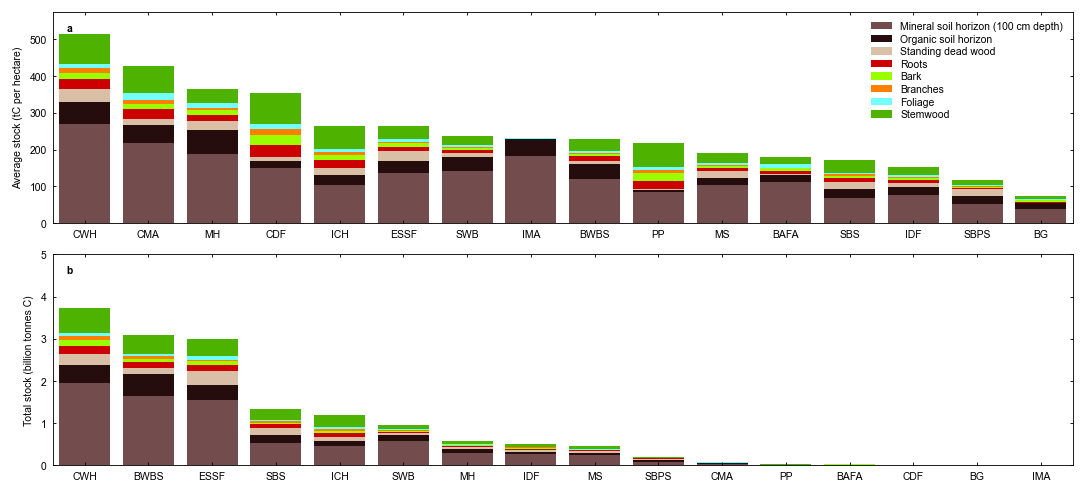

<b>Figure 10</b>. Total ecosystem carbon by BGC zone.

In [44]:
pfp.TEC_ByBGC(meta,dObs_ByBGC,'CN'); plt.show(); 
meta=ufcs.FigureCaption(meta,'Total ecosystem carbon by BGC zone.')

In [45]:
txt=ufcs.AddParagraphs(txt,2)

In [46]:
txt=ufcs.AddParagraphs(txt,2)

In [47]:
txt=ufcs.AddParagraphs(txt,2)

In [48]:
meta=ufcs.TableCaption(meta,'Tree density class statistics.')
df=pd.read_excel(meta['Paths']['Model']['Parameters'] + '\\Parameters_ByTreeDensityClass.xlsx')
df=df.rename(columns={'Unnamed: 0':'Variable'})
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('width','120px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='td',props=[('text-align','right')]), 
    dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
]).hide()
style.set_table_styles({'Variable':[{'selector':'','props': [('text-align','left'),('width','250px')]}]},overwrite=False)  
style.format(precision=1)
display(style)

<b>Table 4</b>. Tree density class statistics.

Variable,Sparse,Open,Dense
Frequency (%),23.0,60.9,13.4
Crown cover from VRI (%),14.9,38.6,58.5
Tree density from plots (stems/ha),1495.0,1573.0,1697.0
Tree biomass from plots (MgC/ha),48.0,69.0,110.0
Net growth from plots (MgC/ha/yr),0.6,0.3,1.0


In [49]:
txt=ufcs.AddParagraphs(txt,2)

In [50]:
meta=ufcs.TableCaption(meta,'Population density of natural regeneration following wildfire, as indicated by silviculture surveys of total well-spaced trees (stems/ha).')
df=pd.read_excel(meta['Paths']['Model']['Parameters'] + '\\Parameters_NaturalRegenPostWildfire.xlsx')
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('width','120px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='td',props=[('text-align','right')]), 
    dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
]).hide()
style.set_table_styles({'Zone / burn severity rating':[{'selector':'','props': [('text-align','left'),('width','200px')]}]},overwrite=False)  
style.format(precision=1)
display(style)

<b>Table 5</b>. Population density of natural regeneration following wildfire, as indicated by silviculture surveys of total well-spaced trees (stems/ha).

Zone / burn severity rating,Unburned,Low,Medium,High
BWBS,1691,1401,1162,1129
IDF,557,266,28,0
MS,591,301,62,29
SBPS,619,328,90,57
SBS,1492,1202,964,931


In [51]:
# Table. Natural stand establishment parameters stratified by biogeoclimatic zone.

In [52]:
txt=ufcs.AddParagraphs(txt,2)

In [53]:
flg=0
if flg==1:
    if meta['Graphics']['Show Maps']=='On':
        vList=['tmean_ann_n','prcp_ann_n','etp_ann_n','runoff_ann_n','melt_ann_n','wsp_ann_n','ws_ann_n','cwd_ann_n']
        roi=u1ha.Import_Raster(meta,roi,vList); 
        p1ha.Plot_ClimateNormalsPanels(meta,roi); plt.show()
        meta=ufcs.FigureCaption(meta,'Climate normals for mean annual (a) air temperature (degC) (b) precipitation depth (mm/year) (c) Penman-Monteith potential evapotranspiration (d) runoff depth (mm/year) (e) melt depth (mm/year) (f) snowpack water content depth (mm) (g) soil water content depth (mm) (h) climatic water deficit (potential minus actual evapotranspiration).')

In [54]:
txt=ufcs.AddParagraphs(txt,2)

In [55]:
meta=ufcs.TableCaption(meta,'Surface shortwave albedo stratified by land cover class. Values come from the MODIS satellite, 2002-2023. Cold season: October-March. Warm season: April-September.')
df=pd.read_excel(meta['Paths']['Model']['Parameters'] + '\\Parameters_AlbedoSurfaceShortwave_ByLC.xlsx')
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('width','100px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='td',props=[('text-align','right')]), 
    dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
]).hide()
style.set_table_styles({' ':[{'selector':'','props': [('text-align','left'),('width','90px'),('font-weight','bold')]}]},overwrite=False)  
style.format(precision=2)
display(style)

<b>Table 6</b>. Surface shortwave albedo stratified by land cover class. Values come from the MODIS satellite, 2002-2023. Cold season: October-March. Warm season: April-September.

,Forest,Shrub,Herb,Wetland,Bryoid,Earth and Rock,Built-up,Snow and Ice,Water
Annual,0.15,0.26,0.27,0.19,0.27,0.32,0.15,0.38,0.14
Cold season,0.17,0.30,0.31,0.22,0.31,0.37,0.15,0.39,0.18
Warm season,0.14,0.21,0.23,0.16,0.23,0.27,0.15,0.37,0.10


In [56]:
txt=ufcs.AddParagraphs(txt,1)

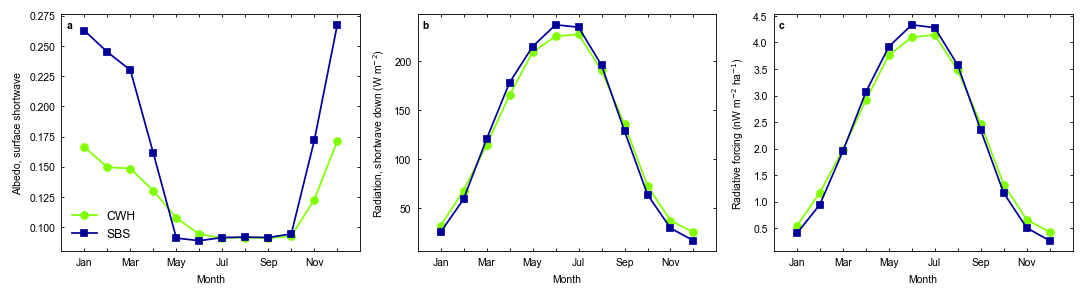

<b>Figure 11</b>. Monthly climatology of (a) surface shortwave albedo (b) downward shortwave radiation (c) albedo radiative forcing for select BGC zones.

In [57]:
uga.Plot_Albedo_Climatology_ByBGCZone(meta); plt.show()
meta=ufcs.FigureCaption(meta,'Monthly climatology of (a) surface shortwave albedo (b) downward shortwave radiation (c) albedo radiative forcing for select BGC zones.')

In [58]:
meta=ufcs.TableCaption(meta,'Surface shortwave albedo radiative forcing stratified by land cover class. Units: nW m-2 ha-1 (see Bernier et al. 2011 for details). Cold season: October-March. Warm season: April-September.')
df=pd.read_excel(meta['Paths']['Model']['Parameters'] + '\\Parameters_RadiationAbsorptionSurfaceShortwave_ByLC.xlsx')
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('width','100px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='td',props=[('text-align','right')]), 
    dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
]).hide()
style.set_table_styles({' ':[{'selector':'','props': [('text-align','left'),('width','90px'),('font-weight','bold')]}]},overwrite=False)  
style.format(precision=2)
display(style)

<b>Table 7</b>. Surface shortwave albedo radiative forcing stratified by land cover class. Units: nW m-2 ha-1 (see Bernier et al. 2011 for details). Cold season: October-March. Warm season: April-September.

,Forest,Shrub,Herb,Wetland,Bryoid,Earth and Rock,Built-up,Snow and Ice,Water
Annual,2.22,2.15,2.11,2.10,1.88,1.92,2.29,1.80,2.24
Cold season,1.13,1.04,0.99,1.00,0.79,0.84,1.19,0.79,1.08
Warm season,3.31,3.26,3.22,3.21,2.96,2.99,3.39,2.81,3.40


In [59]:
txt=ufcs.AddParagraphs(txt,2)

In [60]:
txt=ufcs.AddParagraphs(txt,3)

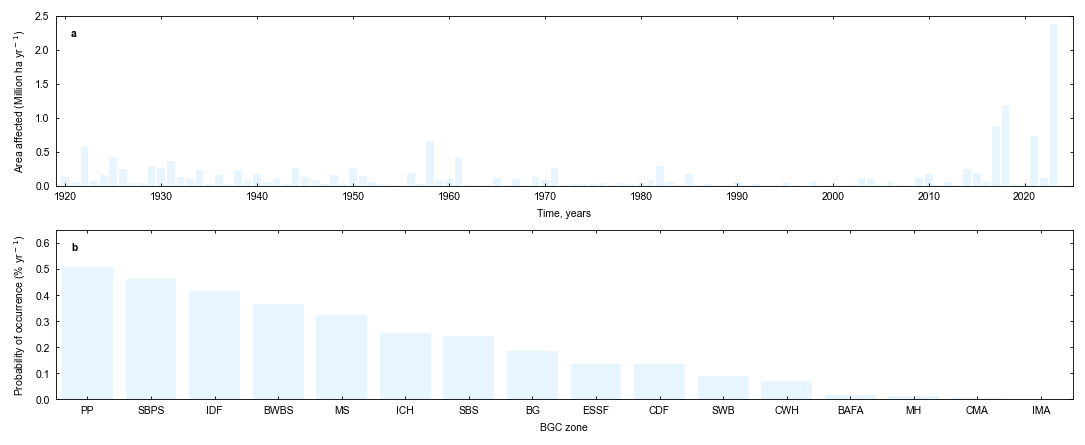

<b>Figure 12</b>. Wildfire occurrence (a) annual area affected (within perimiters) and (b) annual probability of wildfire occurrence, stratified by combinations of biogeoclimatic zone, 1920-2022.

In [61]:
ufcs.Plot_Wildfire_Po_By_BGCZone(meta); plt.show()
meta=ufcs.FigureCaption(meta,'Wildfire occurrence (a) annual area affected (within perimiters) and (b) annual probability of wildfire occurrence, stratified by combinations of biogeoclimatic zone, 1920-2022.')

In [62]:
txt=ufcs.AddParagraphs(txt,2)

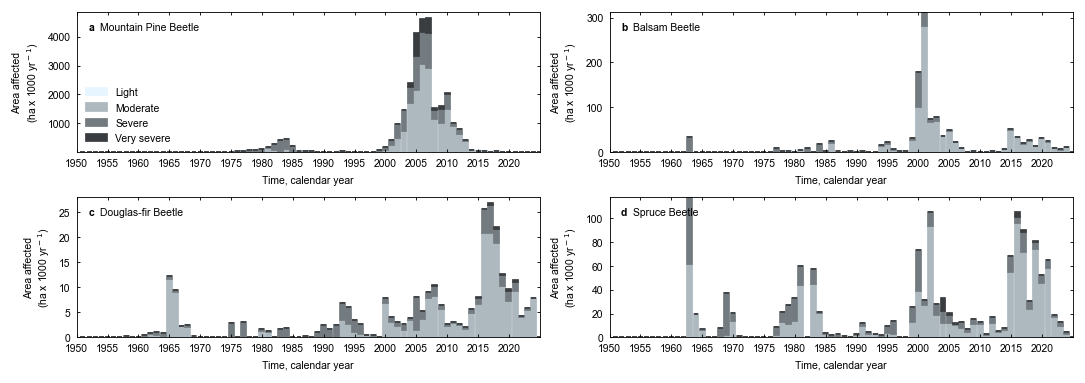

<b>Figure 13</b>. Annual area of beetle outbreak in British Columbia, Canada.

In [63]:
ufcs.PlotBeetleComp1_TS(meta); plt.show()
meta=ufcs.FigureCaption(meta,'Annual area of beetle outbreak in British Columbia, Canada.')

In [64]:
txt=ufcs.AddParagraphs(txt,2)

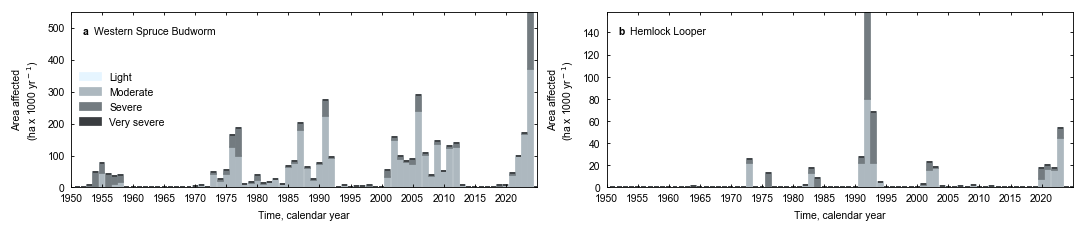

<b>Figure 14</b>. Annual area of defoliator outbreak detected in British Columbia, Canada.

In [65]:
ufcs.PlotDefoliatorComp1_TS(meta); plt.show()
meta=ufcs.FigureCaption(meta,'Annual area of defoliator outbreak detected in British Columbia, Canada.')

In [66]:
txt=ufcs.AddParagraphs(txt,11)

In [67]:
# Import harvest DBs
dTM=gu.ipickle(meta['Paths']['DB']['Harvest'] + '\\Havest_ByTM.pkl')

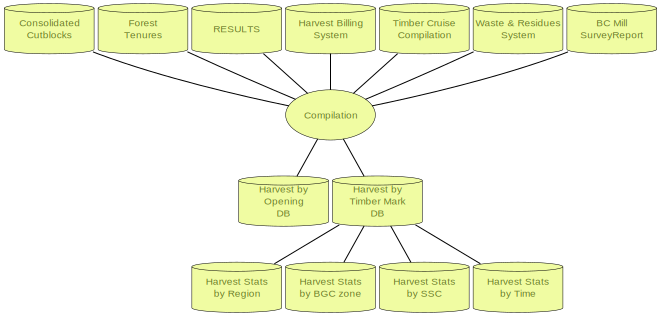

<b>Figure 15</b>. Harvest comilation by timber mark (TM). This database is used to support model parameterization.

In [68]:
capt='Harvest comilation by timber mark (TM). This database is used to support model parameterization.'
ufcs.Plot_FlowChartHarvestByTimberMarkDB(meta,capt); plt.show()
meta=ufcs.FigureCaption(meta,capt)

In [69]:
txt=ufcs.AddParagraphs(txt,2)

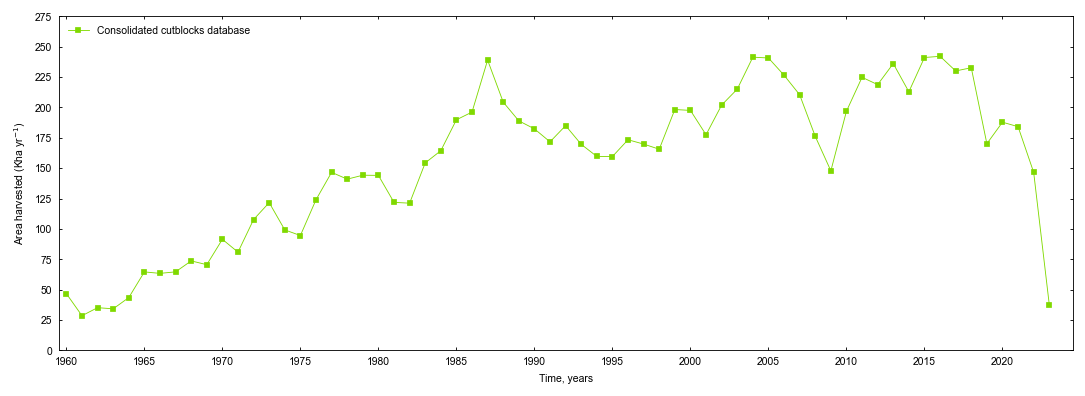

<b>Figure 16</b>. Annual area of forest harvest in British Columbia, Canada.

In [70]:
hut.Plot_HarvestAreaTimeSeries(meta,[1960,2024]); plt.show()
meta=ufcs.FigureCaption(meta,'Annual area of forest harvest in British Columbia, Canada.')

In [71]:
txt=ufcs.AddParagraphs(txt,2)

In [72]:
txt=ufcs.AddParagraphs(txt,6)

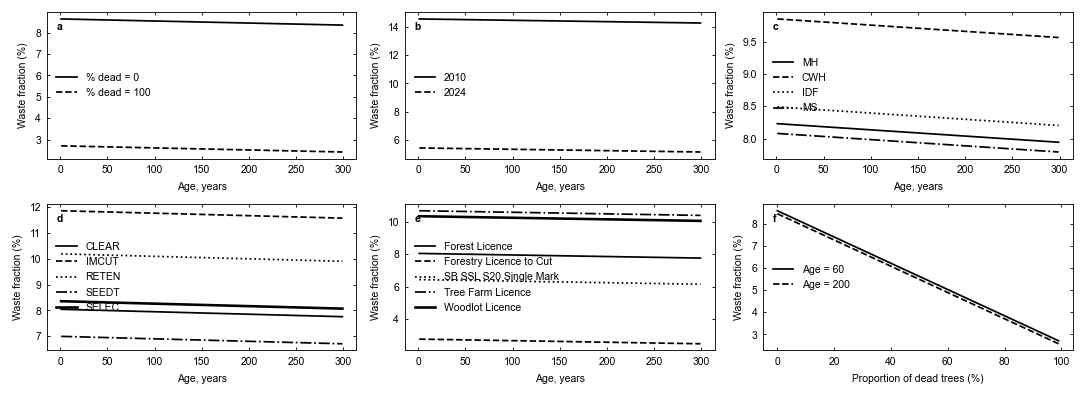

<b>Figure 17</b>. Behaviour of waste fraction derived from regression analysis.

In [73]:
hut.WasteFractionRegression(meta,dTM,save='On',print_table='Off',plot='On'); plt.show()
meta=ufcs.FigureCaption(meta,'Behaviour of waste fraction derived from regression analysis.')

In [74]:
txt=ufcs.AddParagraphs(txt,3)

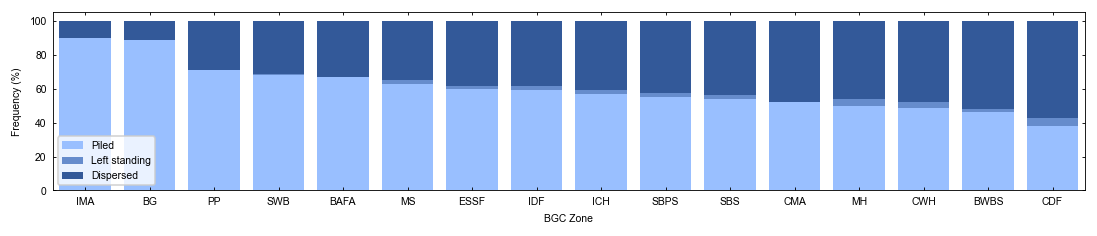

<b>Figure 18</b>. Fate of felled material stratified by BGC zone.

In [75]:
hut.CalcPilingRateByBGCZone(meta,dTM,save='Off',plot='On'); plt.show()
meta=ufcs.FigureCaption(meta,'Fate of felled material stratified by BGC zone.')

In [76]:
txt=ufcs.AddParagraphs(txt,5)

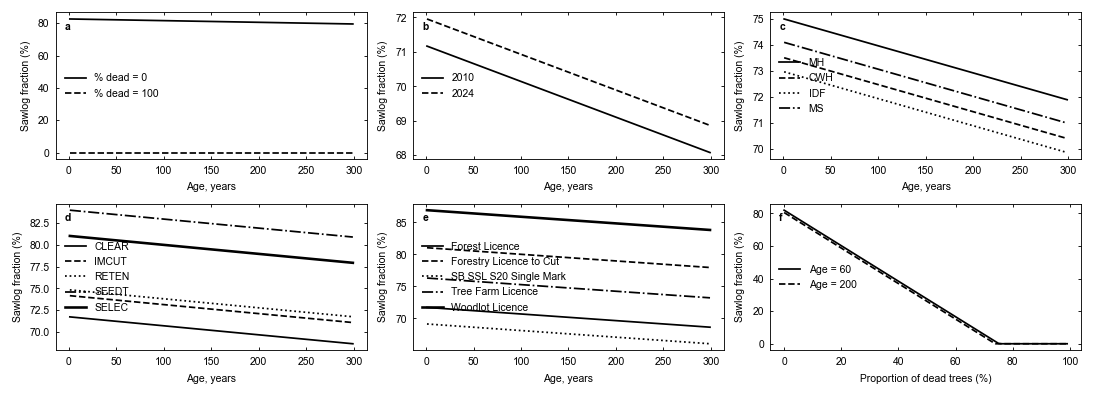

<b>Figure 19</b>. Behaviour of sawlog fraction derived from regression analysis.

In [77]:
hut.SawlogFractionRegression(meta,dTM,save='On',print_table='Off',plot='On'); plt.show()
meta=ufcs.FigureCaption(meta,'Behaviour of sawlog fraction derived from regression analysis.')

In [78]:
txt=ufcs.AddParagraphs(txt,2)

In [79]:
txt=ufcs.AddParagraphs(txt,2)

In [80]:
txt=ufcs.AddParagraphs(txt,18)

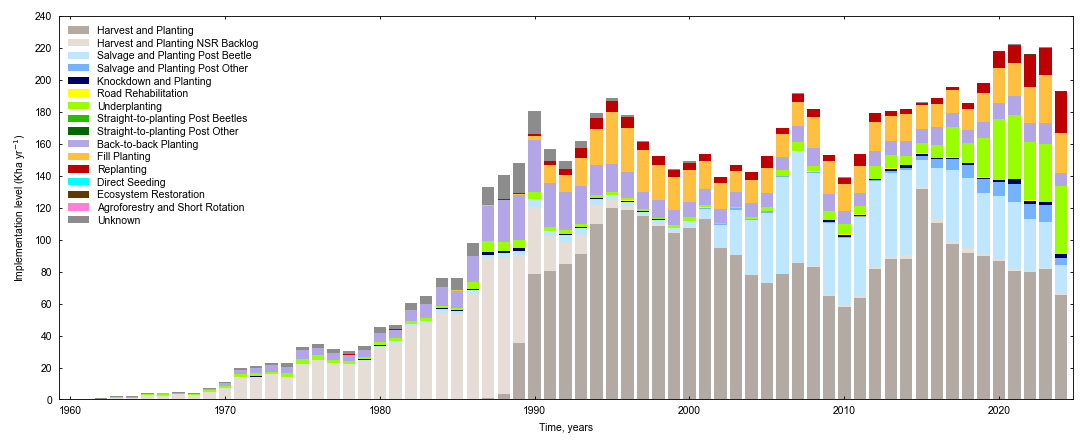

<b>Figure 20</b>. Time series of annual planting implementation level stratified by artifical stand establishment type (ASET).

In [81]:
unose.Plot_AreaTreated_TimeSeriesByASET(meta,'BCFCS_NOSE','With Licensees')
plt.show()
meta=ufcs.FigureCaption(meta,'Time series of annual planting implementation level stratified by artifical stand establishment type (ASET).')

In [82]:
txt=ufcs.AddParagraphs(txt,10)

In [83]:
txt=ufcs.AddParagraphs(txt,2)

466552
79440


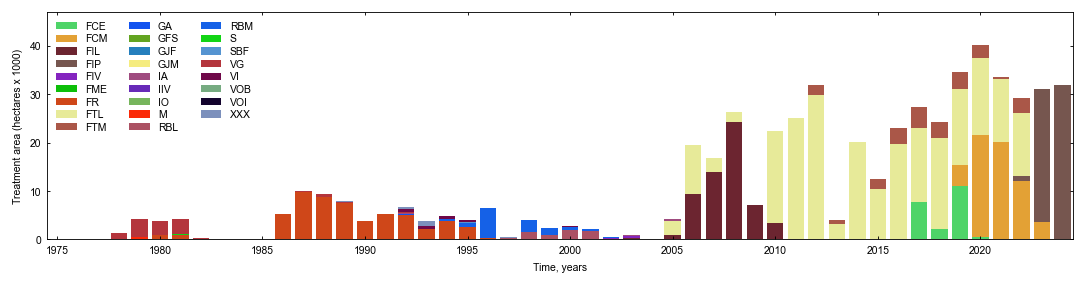

<b>Figure 21</b>. Annual implementation level of aerial nutrient application. Note that the last year may be incomplete depending on the last download date.

In [84]:
pNam='BCFCS_NMC'; meta['Paths'][pNam]={'Data':r'C:\Data\BCFCS\BCFCS_NMC'}
unm.Plot_AreaTreated_TimeSeriesByFSC(meta,'BCFCS_NMC'); plt.show()
meta=ufcs.FigureCaption(meta,'Annual implementation level of aerial nutrient application. Note that the last year may be incomplete depending on the last download date.')

In [85]:
flg=0
if flg==1:
    vList=['feca_yr']; roi=u1ha.Import_Raster(meta,roi,vList); 
    fig,ax=p1ha.Plot_FECA_Year(meta,roi,vList[0]); del roi['grd'][vList[0]]
    plt.show()
    meta=ufcs.FigureCaption(meta,'Aerial nutrient application stratified by calendar year of implementation.')

In [86]:
txt=ufcs.AddParagraphs(txt,2)

In [87]:
txt=ufcs.AddParagraphs(txt,2)

In [88]:
txt=ufcs.AddParagraphs(txt,2)

In [89]:
txt=ufcs.AddParagraphs(txt,2)

In [90]:
txt=ufcs.AddParagraphs(txt,2)

In [91]:
txt=ufcs.AddParagraphs(txt,2)

In [92]:
meta=ufcs.TableCaption(meta,'Summary of change in area of each land cover class between 1800 (rows) and 2019 (columns) (Mha).')
df=pd.read_excel(meta['Paths']['bc1ha'] + '\\LandCoverUse\\Land Cover and Land Use Comp1 Summary.xlsx',sheet_name='LC1800 vs LC2019')
df.iloc[np.where(df=='nan')]=np.nan
df=df.fillna(" ")
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','left'),('width','100px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
])
style.set_table_styles({'LC-Comp1-1800':[{'selector':'','props': [('font-weight','bold'),('width','150px')]}]},overwrite=False)  
style.set_table_styles({'Total (Mha)':[{'selector':'','props':[('font-weight','bold')]}]},overwrite=False)  
style.set_table_styles({'Total (%)':[{'selector':'','props':[('font-weight','bold')]}]},overwrite=False)  
style.set_table_styles({9:[{'selector':'td','props':[('font-weight','bold')]}]},axis=1,overwrite=False)  
style.set_table_styles({10:[{'selector':'td','props':[('font-weight','bold')]}]},axis=1,overwrite=False)  
style.set_properties(**{'text-align':'left'}).hide()
style.format(precision=2)
display(style)

<b>Table 8</b>. Summary of change in area of each land cover class between 1800 (rows) and 2019 (columns) (Mha).

LC-Comp1-1800,Forest,Shrub,Herb,Wetland,Bryoid,Earth and Rock,Built-up,Snow and Ice,Water,Total (Mha),Total (%)
Forest,66.02,1.74,0.00,0.02,0.00,0.17,0.22,0.00,0.00,68.18,71.99
Shrub,0.00,8.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.13,8.59
Herb,0.00,0.00,0.64,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.68
Wetland,0.00,0.00,0.00,2.15,0.00,0.00,0.00,0.00,0.00,2.15,2.27
Bryoid,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01
Earth and Rock,0.00,0.00,0.00,0.00,0.00,9.79,0.00,0.00,0.00,9.79,10.34
Built-up,0.00,0.00,0.00,0.00,0.00,0.00,0.45,0.00,0.00,0.45,0.47
Snow and Ice,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.10,0.00,3.10,3.27
Water,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.26,2.26,2.39
Total (Mha),66.02,9.87,0.64,2.17,0.01,9.96,0.67,3.10,2.26,94.71,


In [93]:
txt=ufcs.AddParagraphs(txt,11)

In [94]:
txt=ufcs.AddParagraphs(txt,12)

In [95]:
txt=ufcs.AddParagraphs(txt,13)

In [96]:
txt=ufcs.AddParagraphs(txt,3)

In [97]:
txt=ufcs.AddParagraphs(txt,11)

In [98]:
txt=ufcs.AddParagraphs(txt,2)

In [99]:
meta=ufcs.TableCaption(meta,'Yield and composition of felled trees stratified by silviculture system class for the interior region.')
df=hut.CalcStatsBySILV_SYSTEM_CODE_And_Region(meta,dTM,'Interior')
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('width','130px'),('background-color',meta['Graphics']['Colours']['rgb']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='td',props=[('text-align','right')]), 
    dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
]).hide()
style.format(precision=1)
style.set_table_styles({'SSC':[{'selector':'','props': [('text-align','left'),('width','70px'),('font-weight','bold')]}]},overwrite=False)  
display(style)

<b>Table 9</b>. Yield and composition of felled trees stratified by silviculture system class for the interior region.

SSC,Sample size (# TMs),Total removals (m3/ha),Total removals (%),Sawlogs (%),Secondary logs (%),Waste wood (%)
CCRES,18005.000000,311.800000,96.800000,49.800000,47.000000,3.200000
CLEAR,4658.000000,290.700000,95.700000,58.400000,37.300000,4.300000
COPPI,10.000000,215.600000,88.700000,40.000000,48.700000,11.300000
IMCUT,69.000000,101.400000,96.300000,67.700000,28.500000,3.700000
PATCT,101.000000,302.000000,95.900000,64.200000,31.700000,4.100000
RETEN,78.000000,258.100000,95.300000,64.700000,30.600000,4.700000
SEEDT,40.000000,272.100000,94.700000,78.600000,16.200000,5.300000
SELEC,665.000000,160.900000,97.200000,75.700000,21.600000,2.800000
SHELT,109.000000,139.900000,93.600000,73.500000,20.100000,6.400000


In [100]:
meta=ufcs.TableCaption(meta,'Yield and composition of felled trees stratified by silviculture system class for the coastal region.')
df=hut.CalcStatsBySILV_SYSTEM_CODE_And_Region(meta,dTM,'Coast')
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('width','130px'),('background-color',meta['Graphics']['Colours']['rgb']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='td',props=[('text-align','right')]), 
    dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
]).hide()
style.format(precision=1)
style.set_table_styles({'SSC':[{'selector':'','props': [('text-align','left'),('width','70px'),('font-weight','bold')]}]},overwrite=False)  
display(style)

<b>Table 10</b>. Yield and composition of felled trees stratified by silviculture system class for the coastal region.

SSC,Sample size (# TMs),Total removals (m3/ha),Total removals (%),Sawlogs (%),Secondary logs (%),Waste wood (%)
CCRES,2709.000000,759.000000,88.600000,66.600000,22.000000,11.400000
CLEAR,1384.000000,680.700000,89.600000,66.900000,22.800000,10.400000
COPPI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
IMCUT,50.000000,212.700000,86.200000,65.900000,20.200000,13.800000
PATCT,10.000000,565.000000,89.500000,75.200000,14.300000,10.500000
RETEN,1417.000000,700.800000,85.400000,63.900000,21.500000,14.600000
SEEDT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SELEC,17.000000,546.400000,83.600000,65.700000,17.900000,16.400000
SHELT,14.000000,337.300000,87.500000,57.600000,29.900000,12.500000


In [101]:
txt=ufcs.AddParagraphs(txt,2)

In [102]:
# Import harvest demo
metaD=gu.ipickle(meta['Paths']['Projects']['Demos'] + '\\Demo_Harv_Clearcut\\Inputs\\Metadata.pkl')
iScn=1
d=cbu.LoadSingleOutputFile(metaD,'Demo_Harv_Clearcut',iScn,0,0)
iS=0
iH=np.where(d['C_Felled'][:,iS]>0)[0][-1]

In [103]:
metaD.keys()

dict_keys(['Paths', 'Graphics', 'Geos', 'LUT', 'Param', 'Climate', 'Modules', 'Tables', 'Core', 'Demo_Harv_Clearcut', 'Logbook'])

26.025
27.099000000000004


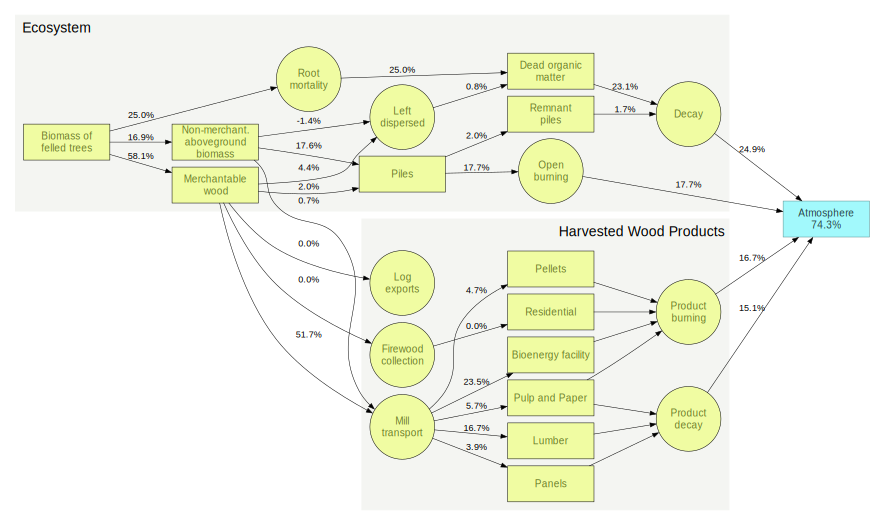

<b>Figure 22</b>. The fate of carbon from felled organic material one year after harvest of a second-growth coastal Douglas-fir stand. Numbers are drawn from model output as means of quality assurance.

In [104]:
capt='The fate of carbon from felled organic material one year after harvest of a second-growth coastal Douglas-fir stand. Numbers are drawn from model output as means of quality assurance.'
uqa.Plot_QA_FateOfFelled(meta,d,iS,iH,100,'72'); plt.show()
meta=ufcs.FigureCaption(meta,capt)

In [105]:
txt=ufcs.AddParagraphs(txt,6)

In [1]:
meta=ufcs.TableCaption(meta,'Percent of carbon mass consumed by type of burning event (Kurz et al. 2009).')
df=pd.DataFrame(meta['Tables']['Core_Combustion'])
df.iloc[np.where(df=='nan')]=np.nan
df=df.fillna(" ")
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('width','200px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='td',props=[('text-align','right')]), 
    dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
])
style.set_table_styles({'Source':[{'selector':'','props': [('text-align','left')]}]},overwrite=False)  
style.set_table_styles({'Carbon pool':[{'selector':'','props': [('font-weight','bold')]}]},overwrite=False)  
style.set_properties(**{'text-align':'left'}).hide()
style.format(precision=2)
display(style)

NameError: name 'ufcs' is not defined

In [107]:
meta=ufcs.TableCaption(meta,'Emission factors for nitrous oxide (N2O). a:Reported as g N2O kg dry fuel consumed-1, converted assuming carbon content of dry biomass = 0.5')
df=pd.DataFrame(meta['Tables']['Core_CombustionN2O'])
df.iloc[np.where(df=='nan')]=np.nan
df=df.fillna(" ")
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('width','200px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='td',props=[('text-align','right')]), 
    dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
])
style.set_table_styles({'Source':[{'selector':'','props': [('text-align','left'),('font-weight','bold')]}]},overwrite=False)  
style.set_table_styles({'Type':[{'selector':'','props': [('text-align','left')]}]},overwrite=False)  
style.set_table_styles({5:[{'selector':'td','props':[('font-weight','bold')]}]},axis=1,overwrite=False)  
style.set_properties(**{'text-align':'left'}).hide()
style.format(precision=2)
display(style)

<b>Table 12</b>. Emission factors for nitrous oxide (N2O). a:Reported as g N2O kg dry fuel consumed-1, converted assuming carbon content of dry biomass = 0.5

Source,g N2O kg CO2-1,Type
Lobart & Warrnatz (1993),0.01 to 0.20,Vegetation
Urbanski et al. (2009)a,0.09,Temperate forest
Urbanski et al. (2009)a,0.07 to 0.22,Boreal forest
Kurz et al. (2009),0.17,Forest
Ter-Mikaelian et al. (2016),0.06,Forest
Mean,0.12,


In [108]:
txt=ufcs.AddParagraphs(txt,4)

In [109]:
txt=ufcs.AddParagraphs(txt,2)

In [110]:
meta=ufcs.TableCaption(meta,'Surface shortwave radiation absorption RF inferred from change in land cover class. Units: nW m-2 ha-1. Negative values indicate net cooling effect on climate, while positive values indicate a net warming effect on climate.')
df=pd.read_excel(meta['Paths']['Model']['Parameters'] + '\\Parameters_RadiationAbsorptionSurfaceShortwaveChange_ByLC.xlsx')
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','right'),('width','100px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='td',props=[('text-align','right')]), 
    dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
]).hide()
style.set_table_styles({' ':[{'selector':'','props': [('text-align','left'),('width','90px'),('font-weight','bold')]}]},overwrite=False)  
style.format(precision=2)
display(style)

<b>Table 13</b>. Surface shortwave radiation absorption RF inferred from change in land cover class. Units: nW m-2 ha-1. Negative values indicate net cooling effect on climate, while positive values indicate a net warming effect on climate.

,Forest,Shrub,Herb,Wetland,Bryoid,Earth and Rock,Built-up,Snow and Ice,Water
Forest,0.00,-0.07,-0.12,-0.12,-0.35,-0.31,0.07,-0.42,0.01
Shrub,0.07,0.00,-0.05,-0.05,-0.28,-0.23,0.14,-0.35,0.09
Herb,0.12,0.05,0.00,0.00,-0.23,-0.19,0.18,-0.30,0.13
Wetland,0.12,0.05,0.00,0.00,-0.23,-0.19,0.19,-0.30,0.13
Bryoid,0.35,0.28,0.23,0.23,0.00,0.04,0.41,-0.07,0.36
Earth and Rock,0.31,0.23,0.19,0.19,-0.04,0.00,0.37,-0.12,0.32
Built-up,-0.07,-0.14,-0.18,-0.19,-0.41,-0.37,0.00,-0.49,-0.05
Snow and Ice,0.42,0.35,0.30,0.30,0.07,0.12,0.49,0.00,0.44
Water,-0.01,-0.09,-0.13,-0.13,-0.36,-0.32,0.05,-0.44,0.00


In [111]:
txt=ufcs.AddParagraphs(txt,1)

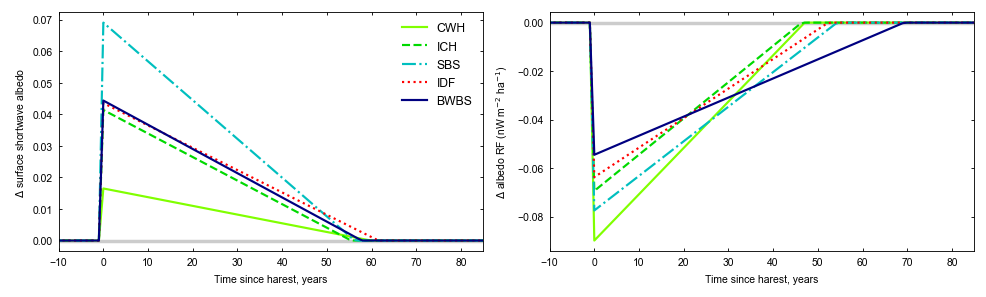

<b>Figure 23</b>. Response of surface shortwave albedo to harvest events, stratified by BGC zone.

In [112]:
uga.Plot_AlbedoResponseToHarvest(meta)
plt.show()
meta=ufcs.FigureCaption(meta,'Response of surface shortwave albedo to harvest events, stratified by BGC zone.')

In [113]:
txt=ufcs.AddParagraphs(txt,4)

In [114]:
txt=ufcs.AddParagraphs(txt,5)

In [115]:
txt=ufcs.AddParagraphs(txt,12)

In [116]:
txt=ufcs.AddParagraphs(txt,21)

In [117]:
txt=ufcs.AddParagraphs(txt,10)

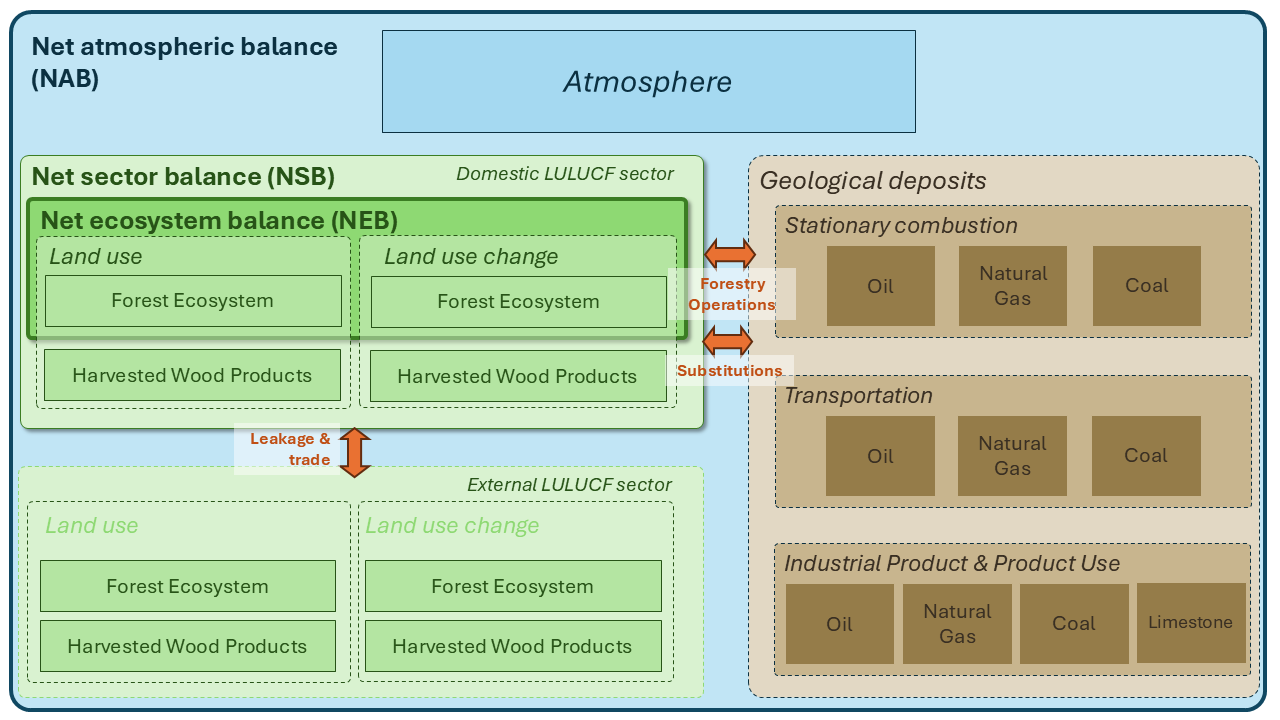

<b>Figure 24</b>. Schematic description of system boundaries for estimation of net ecosystem balance (NEB), net sector balance (NSB) and net actmospheric balance (NAB).

In [118]:
display(Image(filename='images/Scope and Boundary Definition 2.png',width=1000))
meta=ufcs.FigureCaption(meta,'Schematic description of system boundaries for estimation of net ecosystem balance (NEB), net sector balance (NSB) and net actmospheric balance (NAB).')

In [119]:
txt=ufcs.AddParagraphs(txt,10)

In [120]:
txt=ufcs.AddParagraphs(txt,9)

In [121]:
txt=ufcs.AddParagraphs(txt,5)

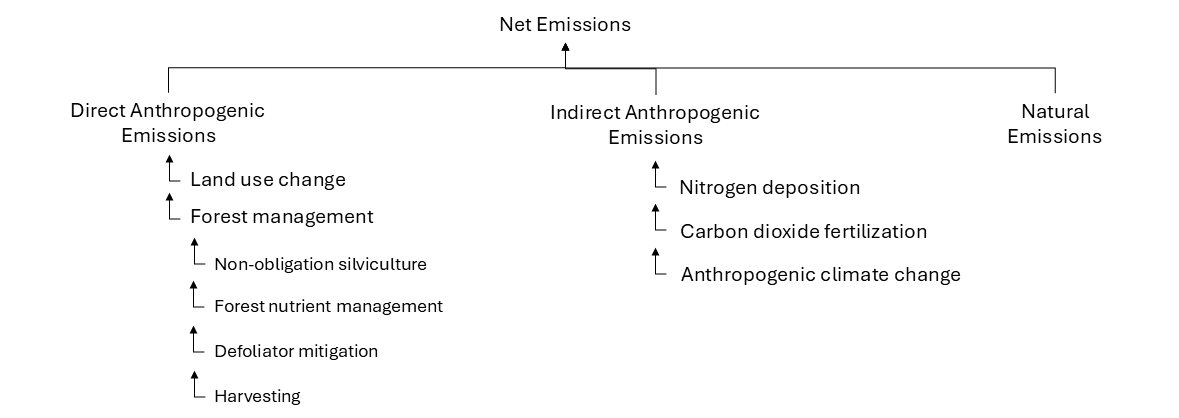

<b>Figure 25</b>. A taxonomy of emission categories

In [122]:
display(Image(filename='images/Taxonomy.png',width=1000))
meta=ufcs.FigureCaption(meta,'A taxonomy of emission categories')
#capt='Taxonomy of climate forcing categories'#ufcs.Plot_Tier2Categories(meta,capt)#meta=ufcs.FigureCaption(meta,capt)

In [123]:
txt=ufcs.AddParagraphs(txt,6)

In [124]:
txt=ufcs.AddParagraphs(txt,5)

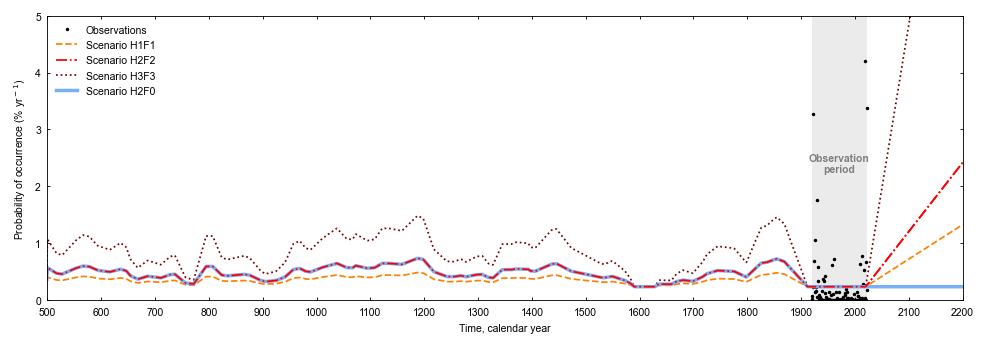

<b>Figure 26</b>. The deterministic component of annual probability of wildfire occurrence (%/yr).

In [125]:
ufcs.Plot_WildfireScenarios(meta,'SBS')
plt.show()
meta=ufcs.FigureCaption(meta,'The deterministic component of annual probability of wildfire occurrence (%/yr).')

In [126]:
txt=ufcs.AddParagraphs(txt,5)

In [127]:
txt=ufcs.AddParagraphs(txt,2)

In [128]:
txt=ufcs.AddParagraphs(txt,2)

In [129]:
txt=ufcs.AddParagraphs(txt,3)

In [130]:
txt=ufcs.AddParagraphs(txt,3)

In [131]:
txt=ufcs.AddParagraphs(txt,2)

In [132]:
txt=ufcs.AddParagraphs(txt,2)

In [133]:
txt=ufcs.AddParagraphs(txt,2)

In [134]:
txt=ufcs.AddParagraphs(txt,4)

In [135]:
txt=ufcs.AddParagraphs(txt,2)

In [136]:
txt=ufcs.AddParagraphs(txt,3)

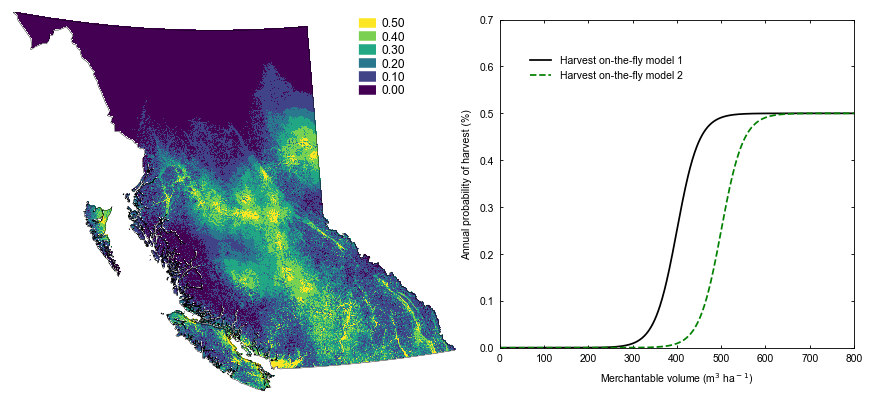

<b>Figure 27</b>. Annual probability of harvest (%/yr).

In [137]:
p1ha.Plot_Harvest_Po(meta,roi)
plt.show()
meta=ufcs.FigureCaption(meta,'Annual probability of harvest (%/yr).')

In [138]:
txt=ufcs.AddParagraphs(txt,2)

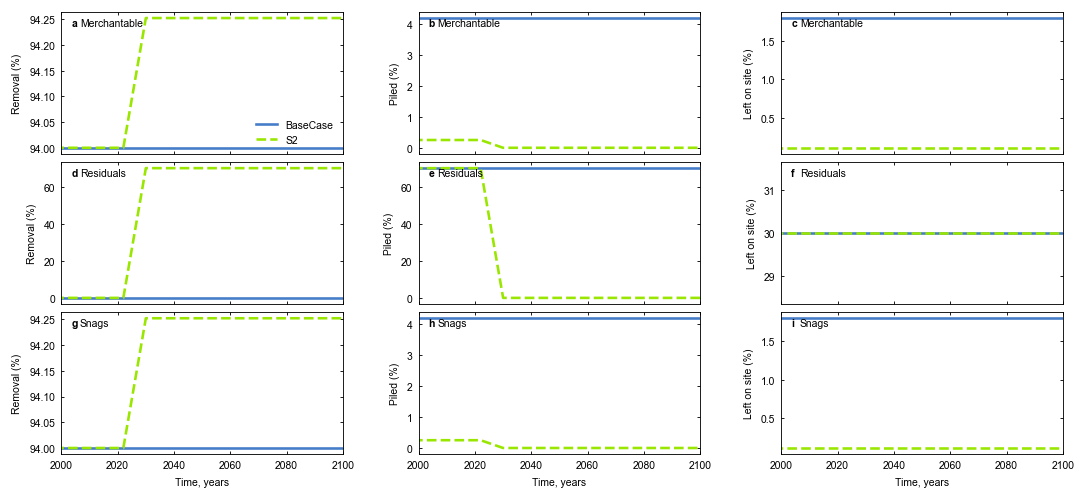

<b>Figure 28</b>. Change in fate of felled matter over time.

In [139]:
scn='S2';
reg='Interior';
ufcs.Plot_FelledFate_Scenarios(meta,scn,reg);
plt.show();
meta=ufcs.FigureCaption(meta,'Change in fate of felled matter over time.')

In [140]:
txt=ufcs.AddParagraphs(txt,2)

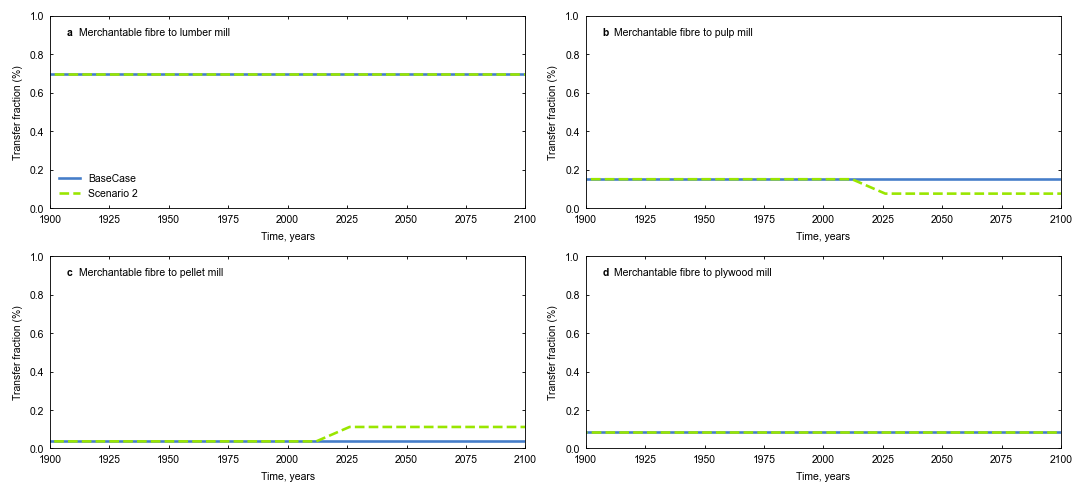

<b>Figure 29</b>. Change in fate of removed matter over time.

In [141]:
scn='S2';
reg='Interior';
ufcs.Plot_RemovedFate_Scenarios(meta,scn,reg);
plt.show();
meta=ufcs.FigureCaption(meta,'Change in fate of removed matter over time.')

In [142]:
txt=ufcs.AddParagraphs(txt,4)

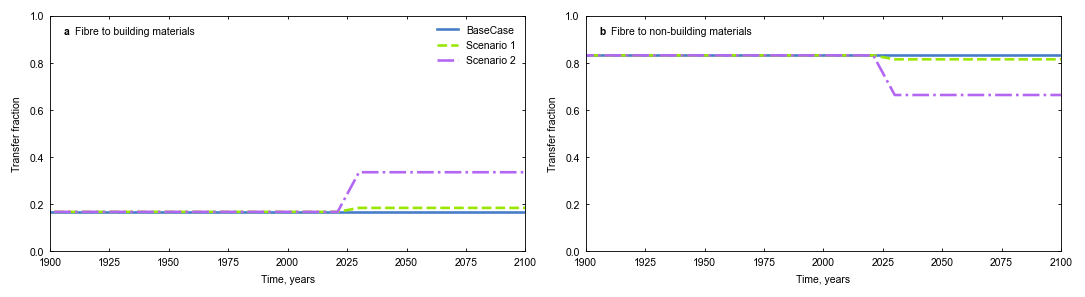

<b>Figure 30</b>. Change in end use of harvest matter over time.

In [143]:
scn='S2';
reg='Interior';
ufcs.Plot_HWP_EndUse_Scenarios(meta,scn,reg); plt.show();
meta=ufcs.FigureCaption(meta,'Change in end use of harvest matter over time.')

In [144]:
txt=ufcs.AddParagraphs(txt,13)

In [145]:
txt=ufcs.AddParagraphs(txt,2)

In [146]:
txt=ufcs.AddParagraphs(txt,5)

In [147]:
txt=ufcs.AddParagraphs(txt,7)

In [148]:
#meta=ufcs.TableCaption(meta,'Comparison of jurisdiction- and economic sector-specific (JSS) reporting and atmosphere-centric (AC) reporting for the forest sector.')
#ufcs.Table(meta['Tables']['BCFCS_BoundaryDefinition'].copy())

In [149]:
meta=ufcs.TableCaption(meta,'Accounting inclusion criteria that are used to assess accounting status.')
df=pd.DataFrame(meta['Tables']['BCFCS_AccountingInclusionCriteria'].copy())
df=df.rename(columns={'Unnamed: 0':'Variable'})
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','left'),('width','225px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='td',props=[('text-align','left')]), 
    dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
]).hide()
style.set_table_styles({'Description':[{'selector':'','props': [('width','700px')]}]},overwrite=False)  
style.format(precision=1)
display(style)

<b>Table 14</b>. Accounting inclusion criteria that are used to assess accounting status.

Name,Description
Anthropogenic,The component of total GHG emissions that are caused by humans.
Controllability,"The component of GHG emissions that are controllable, for example, excluding GHG emissions attributed to past actions, or motivated by comittments to public safety."
Confidence,A level of scientific confidence in estimates of GHG emissions justifying representation of the action.
Materiality,A threshold magnitude of GHG emissions that justifies representation of the action.
Complementary,Does the action contribute to a shared socioeconomic pathway that jointly considers the objectives of domestic forest management values and minimising GHG emissions from the global forest sector.
Additionality,The incremental component of GHG fluxes is determined by annual implementation in exceedance of the mean implementation level of the reference period (MIRP) in years after BC’s authorizing land manger first stated intentions to track climate change mitigation on Crown forest lands.


In [150]:
txt=ufcs.AddParagraphs(txt,7)

In [151]:
meta=ufcs.TableCaption(meta,'List of climate change mitigation strategies, associated land use and management (LUM) policies and conditions of FCI responsibility (“Resp”), materiality (“Mat”), controllability (“Control”), complimentary to BC’s shared socio-economic pathway (“Comp”), and incremental (“Incr”). Classes: No (“N”); Yes (“Y”); Partially (“P”); Unknown (“U”).')
#ufcs.Table(meta['Tables']['BCFCS_Level4CategoriesStatus'].copy())
df=pd.DataFrame(meta['Tables']['BCFCS_Level4CategoriesStatus'].copy())
df.iloc[np.where(df=='nan')]=np.nan
df=df.fillna(" ")
#df=df.rename(columns={'Unnamed: 0':'Variable'})
style=df.style.set_table_styles([
    dict(selector='th',props=[('text-align','left'),('width','70px'),('background-color',meta['Graphics']['Colours']['hex']['Blue Light']),('color',meta['Graphics']['Colours']['hex']['Blue Dark'])]), 
    dict(selector='td',props=[('text-align','left')]), 
    dict(selector='tr:hover',props=[('background-color','#fffbb5')]),
]).hide()
style.set_table_styles({'Tier 3 Category':[{'selector':'','props': [('width','220px')]}]},overwrite=False)  
style.set_table_styles({'Tier 4 Category':[{'selector':'','props': [('width','250px')]}]},overwrite=False)  
style.format(precision=1)
display(style)

<b>Table 15</b>. List of climate change mitigation strategies, associated land use and management (LUM) policies and conditions of FCI responsibility (“Resp”), materiality (“Mat”), controllability (“Control”), complimentary to BC’s shared socio-economic pathway (“Comp”), and incremental (“Incr”). Classes: No (“N”); Yes (“Y”); Partially (“P”); Unknown (“U”).

Tier 3 Category,Tier 4 Category,Controllable,Material,Confidence,Priority,Additionality
Business-as-usual forestry,Clearcut harvesting,Y,Y,Y,Y,?
,Supply-driven variability,N,Y,?,,N
Forest conservation,Parks,Y,Y,?,N,Y
,Forest carbon offset projects,?,?,?,,?
,Old growth management areas,?,?,?,,?
Silviculture,Straight-to-planting,Y,Y,Y,Y,P
,Road rehabilitation,Y,Y,Y,,P
,Knockdown and planting,Y,Y,Y,,P
,Aerial BTK application,Y,P,N,,P
,NSR Backlog,Y,Y,Y,,N


In [152]:
txt=ufcs.AddParagraphs(txt,50)

In [153]:
txt=ufcs.AddParagraphs(txt,50)

<div class="cite2c-biblio"></div>

In [154]:
txt=ufcs.AddParagraphs(txt,45)

In [155]:
txt=ufcs.AddParagraphs(txt,11)

In [156]:
txt=ufcs.AddParagraphs(txt,20)

In [157]:
txt=ufcs.AddParagraphs(txt,8)